# Linear Regression
---
## **Polynomial Linear Regression**
다항회귀

한 feature x의 n차 다항식으로 targert variable인 y를 예측한다.<br/>

(혼공 139p~147p)

목표: 농어 길이의 n차 다항식으로 무게를 예측해보자.<br/><br/>


### **Read CSV file**

In [5]:
import pandas as pd
import numpy as np

# length, height, width
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')

perch_length = df.iloc[:, 0].to_numpy()

# target variable
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


### **Train Test Split**

In [18]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
print(train_input.shape)
print(test_input.shape)

(42,)
(14,)


input data를 2차원 배열로 변형한다.

In [19]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


### **Feature Engineering**
기존 특성을 활용해 새로운 특성을 만드는 작업<br/>
>- sklearn.preprocessing PolyFeatures<br/>
>  각 특성의 제곱, 특성끼리 곱한 항을 추가한다.

input data만 전달하여 fit, transform 진행.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

# 특성 조합 확인
poly.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [34]:
print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


### **모델 학습**

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_poly, train_target)

print(model.coef_, model.intercept_)

[-21.55792498   1.01433211] 116.05021078278395


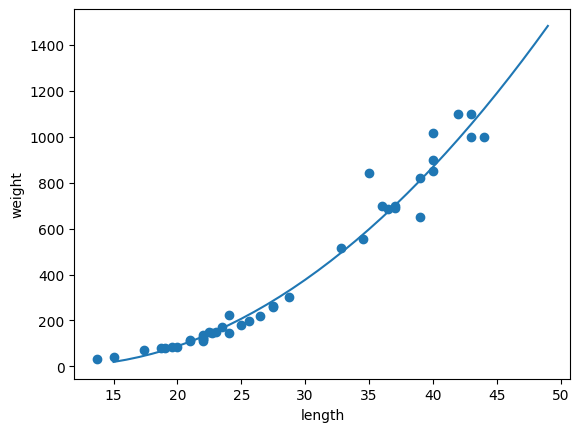

In [33]:
import matplotlib.pyplot as plt
point = np.arange(15,50)
plt.plot(point, 1.01*point**2 -21.6*point + 116.05)

plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
print(model.score(train_poly, train_target))
print(model.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


train 점수보다 test 점수가 높으므로 여전히 과소적합이므로
모델을 더 복잡하게 만들 필요가 있다.

csv파일의 length data만 사용했으나, 다음에는 height, width feature도 사용하자.